<a href="https://colab.research.google.com/github/shreyanshchordia/Faces/blob/master/Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Detecting faces and cropping the images.***
This prepares our data for face recognition.


**How does this work?**

For detecting a face, in an image we already have many successful algorithms. Deep learning, itself has well defined networks to deal with this problem. The Neural Network that deals with this problem is the MTC Neural Network (Multi-Tasking Classification Neural Network). But it would be surprising to many that the best solution for detecting a face in an image doesn't come from Deep Learning Algorithms but it comes from the famous research paper by Viola-Jones. 

This algorithm, does nothing but searches for features in the image. We call them **HAAR-LIKE Features**.

According to Viola and Jones, these features exactly define a face. So basically a face is a face if HAAR_LIKE features can be detected on it.

https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf

**How did Viola-Jones know that these features were the best features to describe a face?**

Now, here is  where  Machine Learning comes into picture. 

So, this is how the best of the features that define a face, were found out.
Faces were tried to be detected using a large number of features on Adaboost Classifiers and all the weak classifiers that were generated were analysed to come up with the best features that defined a face. And these were the features the presence of which confirmed presence of a face.


![HAAR_LIKE FEATURES](https://qphs.fs.quoracdn.net/main-qimg-f14c8b76756db356a4f168d3a998a061.webp)

![alt text](https://qphs.fs.quoracdn.net/main-qimg-667ef28b0bfb903b1af6452aff6a247e.webp)


In [0]:
!pip install opencv-python


In [0]:
import matplotlib.pyplot as plt

**Note** : The image was added during run time via drive

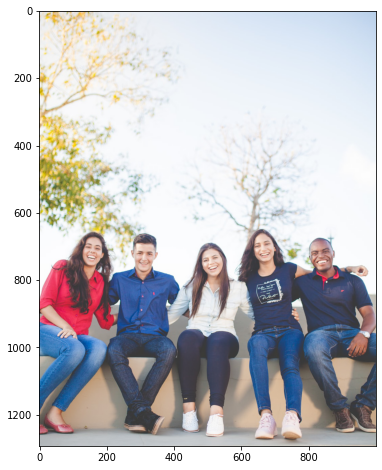

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
plt.figure(figsize=(10,8))
img =plt.imread('imagedetection.jpeg')
plt.imshow(img)


**Note :** haarcascade_frontalface_default.xml was loaded during runtime

##***Face detection in images***

-1

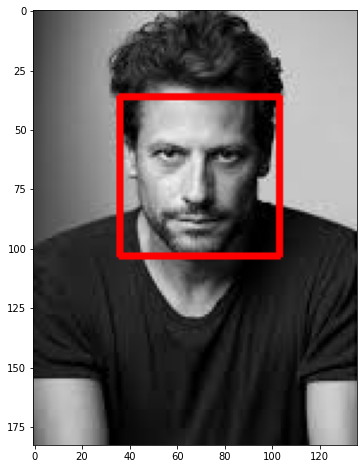

In [0]:
import cv2
plt.figure(figsize=(10,8))
# Load the cascade
face_cascade = cv2.CascadeClassifier('/haarcascade_frontalface_default.xml')
# Read the input image
img = plt.imread('/facedetection2.jpeg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = np.array(gray, dtype='uint8')
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
plt.imshow(img)
cv2.waitKey()

-1

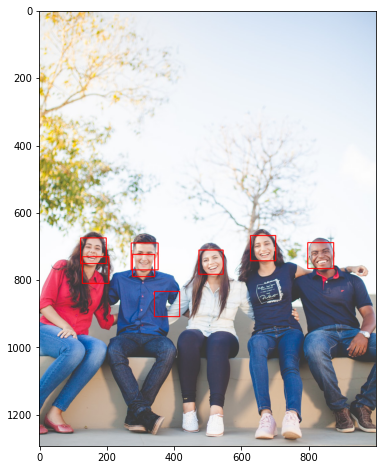

In [0]:
import cv2
plt.figure(figsize=(10,8))
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
img = plt.imread('/content/photo-1517486808906-6ca8b3f04846.jpeg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
plt.imshow(img)
cv2.waitKey()

#***Face Recognition***

##***Loading Data for face recognition***

In [0]:
from sklearn.datasets import fetch_lfw_pairs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
lfw_pairs = fetch_lfw_pairs(color=True)

In [0]:
lfw_pairs.pairs.shape

(2200, 2, 62, 47, 3)

In [0]:
print(lfw_pairs.pairs.shape)
print(lfw_pairs.pairs[0][0])

(2200, 2, 62, 47, 3)
[[[112.  81.  28.]
  [110.  78.  24.]
  [121.  89.  35.]
  ...
  [167. 132.  58.]
  [164. 132.  58.]
  [161. 132.  62.]]

 [[109.  76.  25.]
  [110.  78.  24.]
  [126.  93.  38.]
  ...
  [165. 130.  56.]
  [158. 127.  50.]
  [151. 121.  48.]]

 [[109.  78.  27.]
  [116.  84.  31.]
  [138. 104.  50.]
  ...
  [163. 128.  57.]
  [160. 129.  53.]
  [152. 124.  49.]]

 ...

 [[210. 178.  75.]
  [202. 172.  70.]
  [209. 186.  92.]
  ...
  [182. 157. 127.]
  [179. 161. 137.]
  [205. 195. 177.]]

 [[222. 186.  87.]
  [205. 174.  72.]
  [200. 175.  78.]
  ...
  [177. 158. 128.]
  [172. 161. 140.]
  [185. 180. 168.]]

 [[219. 179.  90.]
  [215. 182.  87.]
  [198. 173.  78.]
  ...
  [170. 157. 129.]
  [166. 164. 149.]
  [155. 157. 153.]]]


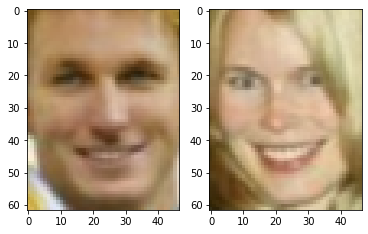

In [0]:
plt.subplot(1,2,1)
plt.imshow(np.array(lfw_pairs.pairs[0][0],dtype=np.uint8))
plt.subplot(1,2,2)
plt.imshow(np.array(lfw_pairs.pairs[220][0],dtype=np.uint8))

Converting image to grayscale

In [0]:
data =[]
for sample in lfw_pairs.pairs:
  for pair in sample:
    for row in pair:
      for col in row:
        y = 0.2125*col[0] + 0.7154*col[1] + 0.0721*col[2]
        data.append(y)

In [0]:
print(len(data))

12821600


In [0]:
data = np.asarray(data)
data = np.reshape(data,(2200, 2, 62, 47))

In [0]:
print(data.shape)
print(data[0])

(2200, 2, 62, 47)
[[[ 83.7662  80.9066  91.9066 ... 134.1021 133.4646 133.1155]
  [ 79.3354  80.9066  96.047  ... 132.1021 128.0358 122.1117]
  [ 80.9104  86.9787 107.3316 ... 130.3184 130.1079 124.5425]
  ...
  [177.3737 171.0208 184.1101 ... 160.1495 163.0946 195.8272]
  [186.5121 173.2333 173.3188 ... 159.8745 161.8234 180.1973]
  [181.0831 182.163  171.463  ... 157.7437 163.3435 156.2866]]

 [[ 73.6633  82.5191  92.7999 ...  79.5135  61.4546  43.6861]
  [ 76.5988  77.1604  84.0845 ...  80.7981  67.3104  53.8227]
  [ 68.9593  73.3046  87.4412 ...  88.8702  76.8816  67.4622]
  ...
  [105.3689 109.0901 111.0218 ... 228.8805 233.4535 238.5977]
  [104.5872 107.2305 110.0901 ... 231.666  235.5977 240.3852]
  [105.5209 107.0863 109.9459 ... 232.8765 237.239  241.5294]]]


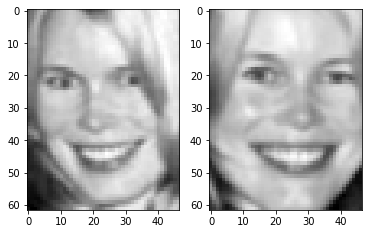

In [0]:
plt.subplot(1,2,1)
plt.imshow(data[220][0],cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(data[220][1],cmap=plt.cm.gray)

In [0]:
Y = lfw_pairs.target

In [0]:
#Number of matched pairs
c=0
for i in Y:
  if i==1: c+=1
print(c)
print(c/len(Y))

1100
0.5


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,Y, test_size = 0.15,stratify=Y,random_state= 1)

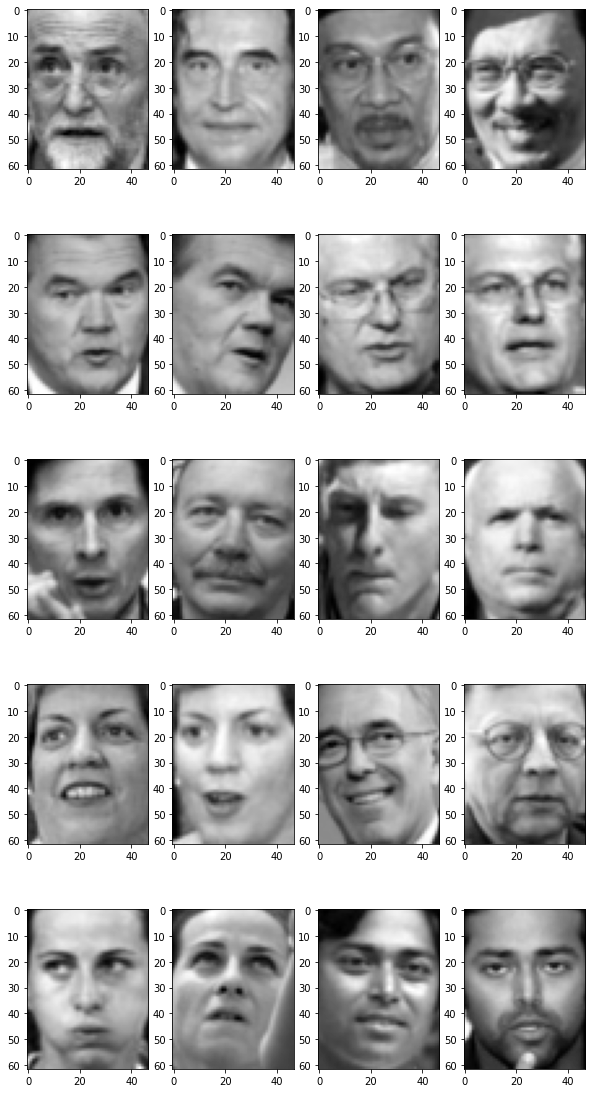

In [0]:
count = 1
plt.figure(figsize=(10,20))
for i in range(10):
  plt.subplot(5,4,count)
  plt.imshow(X_test[i][0],cmap=plt.cm.gray)
  plt.subplot(5,4,count+1)
  plt.imshow(X_test[i][1],cmap=plt.cm.gray)
  count+=2


Here we will try different classification algorithms to see, if we can differentiate between two mismatched images.


##**Training on X_train**


In [0]:
X_tr = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
X_te = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
from sklearn.preprocessing import normalize

X_tr = normalize(X_tr)
X_te = normalize(X_te)

In [0]:
results=[]
models = []
names=[]
models.append(('LR',LogisticRegression(penalty='l2',C=1, solver='liblinear',max_iter=3000)))
models.append(('NB', GaussianNB()))
models.append(('RFC',RandomForestClassifier(n_estimators=100)))
for name, model in models:
	kfold = StratifiedKFold(n_splits=5)
	cv_results = cross_val_score(model, X_tr, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.521390 (0.024094)
NB: 0.549198 (0.022023)
RFC: 0.603209 (0.019102)


##**Training on X_train - np.mean(X_train)**
Trying to differentiate between two faces by subtracting the mean of all the faces. So that we completely focus on the variability rather than the features that are common among all. By subtracting the mean, we get rid of  what's common among all the faces.

In [0]:
X_tr = X_tr - np.mean(X_tr)
X_te = X_te - np.mean(X_tr)
results=[]
models = []
names=[]
models.append(('LR',LogisticRegression(penalty='l2',C=1, solver='liblinear',max_iter=3000)))
models.append(('NB', GaussianNB()))
models.append(('RFC',RandomForestClassifier(n_estimators=100)))
for name, model in models:
  kfold = StratifiedKFold(n_splits=5)
  cv_results = cross_val_score(model, X_tr, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.525134 (0.025287)
NB: 0.549198 (0.022023)
RFC: 0.608556 (0.017784)


###***61% Accuracy***

##**Training on | X_train[ pair1 ] - X_train[ pair2 ] |**
I want to try an experiment of comparing the two images by subtracting 
the corresponding pixel values of the two images to be compared.

I want to see if I can get any better results.
Because currently all the algorithms are at an average accuracy of 50%.

But that is the base value. Because even if our model predicts all the outputs as 1, still we can achieve an accuracy of 50%.

Hence currently we havent benefited from the classifiers.

In [0]:
X_tr = (X_train[:,0,:,:]- X_train[:,1,:,:])
X_te = (X_test[:,0,:,:]- X_test[:,1,:,:])
X_tr = np.absolute(X_tr)
X_te = np.absolute(X_te)
####################
X_tr = np.reshape(X_tr,(X_tr.shape[0],X_tr.shape[1]*X_tr.shape[2]))
X_te = np.reshape(X_te,(X_te.shape[0],X_te.shape[1]*X_te.shape[2]))
####################
scaler = MinMaxScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

In [0]:
####################
results=[]
models = []
names=[]
models.append(('LR',LogisticRegression(penalty='l2',C=1, solver='liblinear',max_iter=3000)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier(n_estimators=100)))
for name, model in models:
	kfold = StratifiedKFold(n_splits=5)
	cv_results = cross_val_score(model, X_tr, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.627807 (0.036481)
NB: 0.605882 (0.019837)
SVM: 0.628342 (0.029630)
RFC: 0.647059 (0.019793)


###***65% Accuracy***
####*Achieved an accuracy of 65%*

##***New Method : Eigen Faces / PCA***

Reference material : 

https://youtu.be/FgakZw6K1QQ 

https://medium.com/datadriveninvestor/principal-components-analysis-pca-71cc9d43d9fb

In [0]:
from sklearn.datasets import fetch_lfw_pairs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
import keras

Using TensorFlow backend.


In [0]:
lfw_people = fetch_lfw_people(min_faces_per_person=50)

In [0]:
print(lfw_people.data.shape,lfw_people.images.shape,lfw_people.target.shape,lfw_people.target_names.shape)

(1560, 2914) (1560, 62, 47) (1560,) (12,)


###***So here we have loaded the data***.

The LFW_PEOPLE has DATA, IMAGES, TARGET and TARGET_NAMES

1. DATA flattens all the images into an array.
2. IMAGES can be plotted since they have the pixel values(grayscale) in a matrix form (62 X 47)
3. TARGET have ID for different personalities.
4. TARGET_NAMES has names for every single person in the targets.

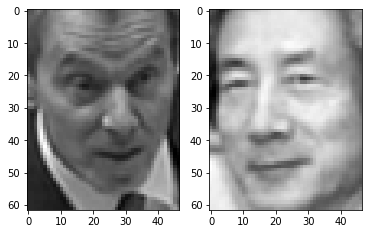

In [0]:
plt.subplot(1,2,1)
plt.imshow(np.array(lfw_people.images[0],dtype=np.uint8),cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(np.array(lfw_people.images[300],dtype=np.uint8),cmap=plt.cm.gray)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(lfw_people.images,lfw_people.target,stratify=lfw_people.target,
                                                 test_size=0.05,random_state=1)

In [0]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [0]:
img_height = X_train.shape[1]
img_width = X_train.shape[2]
train_samples = X_train.shape[0]
test_samples = X_test.shape[0]
print(img_height,img_width,train_samples,test_samples)

62 47 1482 78


In [0]:
X_train = np.reshape(X_train,(train_samples,img_height*img_width))
print(X_train.shape)
X_test = np.reshape(X_test,(test_samples,img_height*img_width))
print(X_test.shape)

(1482, 2914)
(78, 2914)


In [0]:

scaler = MinMaxScaler(feature_range=[0, 1])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
def scaled_vector_2_img(scaler,v,img_width,img_height):
  x = np.reshape(scaler.inverse_transform(v.reshape(1,v.shape[0])),(img_height,img_width))
  return x

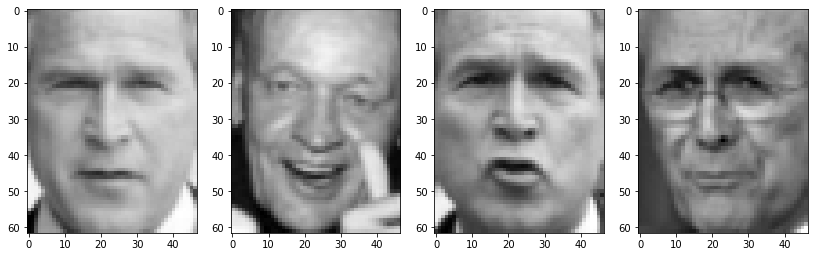

In [0]:
plt.figure(figsize=(14,8))
plt.subplot(1,4,1)
plt.imshow(scaled_vector_2_img(scaler,X_train[0],img_width,img_height),cmap=plt.cm.gray)
plt.subplot(1,4,2)
plt.imshow(scaled_vector_2_img(scaler,X_train[17],img_width,img_height),cmap=plt.cm.gray)
plt.subplot(1,4,3)
plt.imshow(scaled_vector_2_img(scaler,X_test[1],img_width,img_height),cmap=plt.cm.gray)
plt.subplot(1,4,4)
plt.imshow(scaled_vector_2_img(scaler,X_test[2],img_width,img_height),cmap=plt.cm.gray)

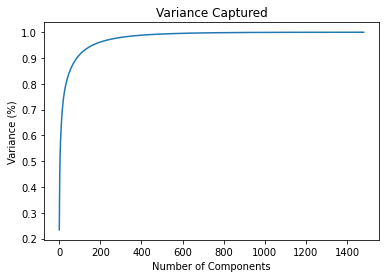

In [0]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance Captured')
plt.show()

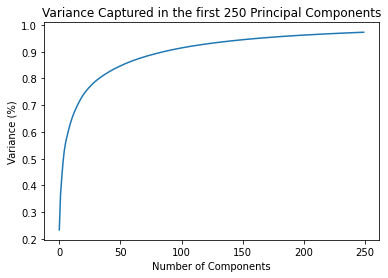

In [0]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:250,]))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance Captured in the first 250 Principal Components')
plt.show()

Since we are able to capture more than 95% of the variance by just using the first 250 principal components, hence we reduce the dimensionality of the data to 250

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
pca = PCA(n_components=250)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
X_train.shape

(1482, 250)

In [0]:
enc = OneHotEncoder(handle_unknown='ignore')
Y_train = enc.fit_transform(Y_train.reshape(train_samples,1)).todense()
Y_test = enc.fit_transform(Y_test.reshape(test_samples,1)).todense()
print(Y_train.shape)

(1482, 12)


In [0]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(50, activation='relu', input_shape=(250,)))

# Add one hidden layer 
model.add(Dense(25, activation='relu'))

# Add an output layer 
model.add(Dense(12, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=5,epochs=100,verbose=1,validation_data=(X_test,Y_test))

Train on 1482 samples, validate on 78 samples
Epoch 1/100
1482/1482 [==============================] - 1s 857us/step - loss: 0.2342 - acc: 0.9238 - val_loss: 0.1850 - val_acc: 0.9402
Epoch 2/100
1482/1482 [==============================] - 1s 683us/step - loss: 0.1575 - acc: 0.9457 - val_loss: 0.1234 - val_acc: 0.9573
Epoch 3/100
1482/1482 [==============================] - 1s 642us/step - loss: 0.0961 - acc: 0.9654 - val_loss: 0.0845 - val_acc: 0.9701
Epoch 4/100
1482/1482 [==============================] - 1s 646us/step - loss: 0.0565 - acc: 0.9818 - val_loss: 0.0719 - val_acc: 0.9733
Epoch 5/100
1482/1482 [==============================] - 1s 641us/step - loss: 0.0332 - acc: 0.9911 - val_loss: 0.0602 - val_acc: 0.9776
Epoch 6/100
1482/1482 [==============================] - 1s 634us/step - loss: 0.0188 - acc: 0.9960 - val_loss: 0.0523 - val_acc: 0.9786
Epoch 7/100
1482/1482 [==============================] - 1s 659us/step - loss: 0.0100 - acc: 0.9986 - val_loss: 0.0454 - val_acc: 0.

In [0]:
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  max = np.max(y_pred[i])
  for j in range(12):
    if y_pred[i][j]<max : y_pred[i][j] =0
    else : y_pred[i][j] = 1

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.8846153846153846
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.85      0.92      0.88        12
           2       1.00      0.83      0.91         6
           3       0.93      0.96      0.94        26
           4       1.00      1.00      1.00         5
           5       1.00      0.67      0.80         3
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00         3
           8       1.00      0.67      0.80         3
           9       0.67      0.67      0.67         3
          10       1.00      0.67      0.80         3
          11       0.70      1.00      0.82         7

   micro avg       0.88      0.88      0.88        78
   macro avg       0.90      0.82      0.85        78
weighted avg       0.90      0.88      0.88        78
 samples avg       0.88      0.88      0.88        78



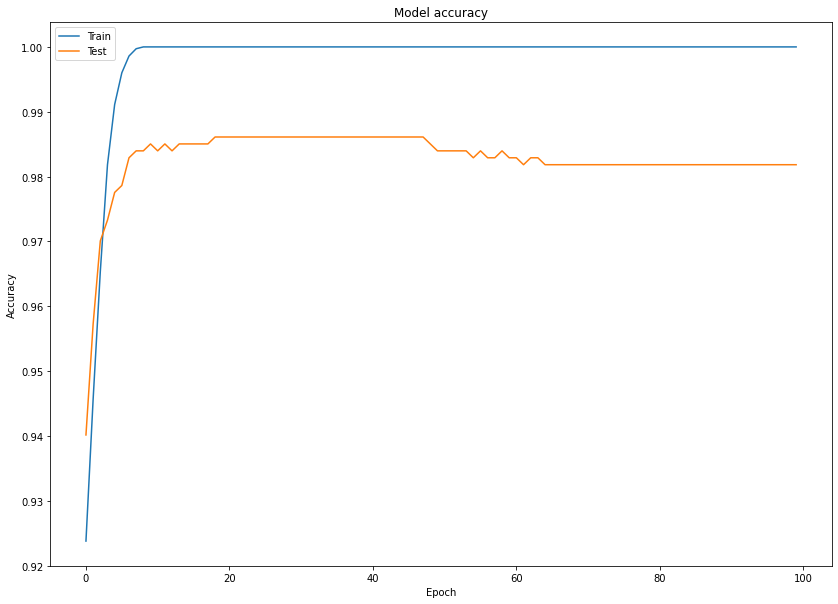

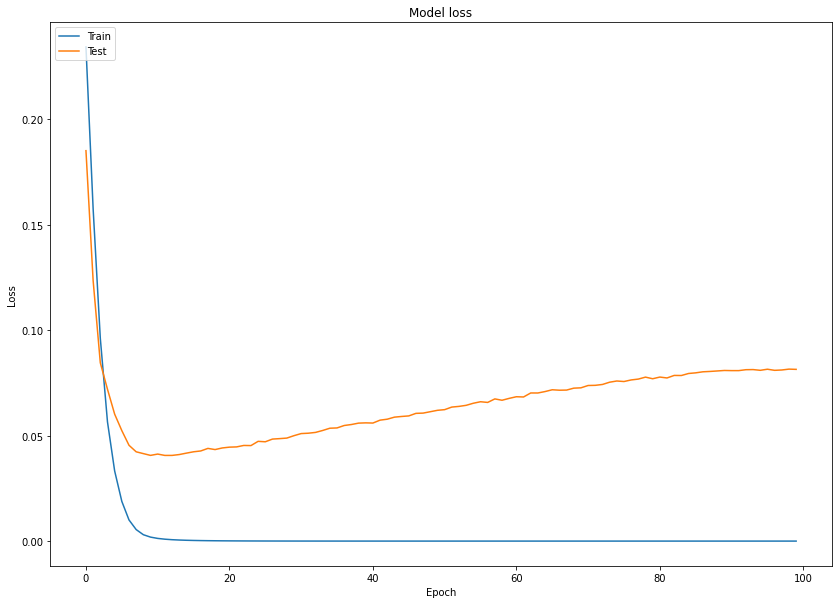

In [0]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(14,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                12550     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                312       
Total params: 14,137
Trainable params: 14,137
Non-trainable params: 0
_________________________________________________________________


###***88.5% accuracy***
We have done fairly well here.

  1. Our approach was simple. We reduced the dimensionality of our data using PCA
  2. We selected the first 250 eigen faces (/250 principal components) since it covered more than 95% of the total variance of our data.
  3. Then we used a convolutional neural network to train it to recognize the corresponding 12 faces.
  4. The architecture of the neural network was (250--50-25--12)
  5. Accuracy achieved - 85%


**Limitations** - We only trained our model to recognize the 12 faces of our dataset. Will this work on other faces? How can we recognize N number of faces? How can assume an output unit for every single face that exists on the planet?

**Solution** - Next section

https://jeremykun.com/2011/07/27/eigenfaces/


https://www.kaggle.com/arpandhatt/siamese-neural-networks


https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184


https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

Trying the above model using PyTorch

In [0]:
import torch
from torch import optim
import torch.nn.functional as F
import torch.nn as nn

In [0]:
class FaceModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(250,50),
        nn.ReLU(),
        nn.Linear(50,25),
        nn.ReLU(),
        nn.Linear(25,12)
    )
  def forward(self,X):
    return self.net(X)

In [0]:
def accuracy(y_hat,y):
  pred = torch.argmax(y_hat,dim=1)
  return (pred==y).float().mean()

In [0]:
def fit(x,y,model,opt,loss_f,epochs):
  loss_arr= []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = model(x)
    loss = loss_f(y_hat,y)
    acc = accuracy(y_hat,y)
    loss_arr.append(loss.item())
    acc_arr.append(acc)
    loss.backward()
    opt.step()
    opt.zero_grad()

  plt.plot(loss_arr,'r-')
  plt.show()
  plt.plot(acc_arr,'b-')
  plt.show()
  print(loss_arr[0],loss_arr[-1])
  print(acc_arr[-1])

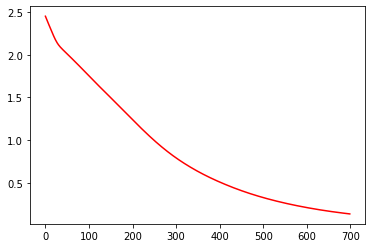

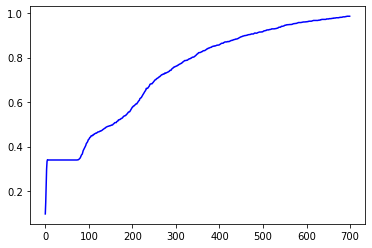

2.4502744674682617 0.13616865873336792
tensor(0.9858, device='cuda:0')
0.8731403350830078


In [0]:
import time
device = torch.device("cuda")
y = enc.inverse_transform(Y_train).reshape((Y_train.shape[0],))
x = torch.tensor(X_train).to(device)
y = torch.tensor(y).to(device)
x = x.float()
y = y.long()
fn = FaceModel()
fn = fn.to(device)
loss_f = torch.nn.CrossEntropyLoss()
opt = optim.SGD(fn.parameters(),lr=0.1)
tic = time.time()
fit(x,y,fn,opt,loss_f,epochs=700)
toc = time.time()
print(toc - tic)

In [0]:
device = torch.device("cuda")
y = enc.inverse_transform(Y_test).reshape((Y_test.shape[0],))
x = torch.tensor(X_test).to(device)
y = torch.tensor(y).to(device)
x = x.float()
y = y.long()
fn = fn.to(device)
y_hat = fn(x)
pred = torch.argmax(y_hat,dim=1)
print((pred==y).float().mean())

tensor(0.8846, device='cuda:0')


##***The Siamese Network / FaceNet***

https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

https://arxiv.org/pdf/1503.03832.pdf

https://medium.com/@mohitsaini_54300/train-facenet-with-triplet-loss-for-real-time-face-recognition-a39e2f4472c3

https://medium.com/@athul929/building-a-facial-recognition-system-with-facenet-b9c249c2388a

My notebook on Siamese Network

https://colab.research.google.com/drive/1KjtrUfvIwn2H-iYI1pFM5xeBcoaaIgqJ